In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle


In [51]:
model_df = pd.read_csv('../data/new_df.csv')

In [52]:
x=model_df.drop(columns="Outcome",axis=1)
y=model_df["Outcome"]

In [53]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [55]:
SVM=SVC(kernel="linear")
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [56]:
SVM_pred=SVM.predict(x_test)
SVM_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0])

In [57]:
print("Classification  Report : \n ",classification_report(y_test,SVM_pred))

Classification  Report : 
                precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.68      0.60      0.63        42

    accuracy                           0.79       141
   macro avg       0.76      0.74      0.75       141
weighted avg       0.79      0.79      0.79       141



In [58]:
print("Accuracy  : \n ",accuracy_score(y_test,SVM_pred))

Accuracy  : 
  0.7943262411347518


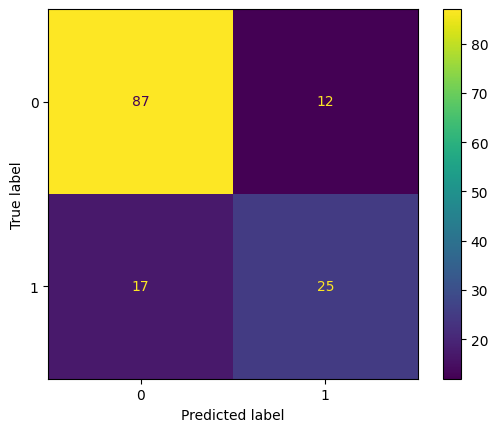

In [59]:
cm=confusion_matrix(y_test,SVM_pred)
p=ConfusionMatrixDisplay(confusion_matrix=cm)
p.plot()
plt.show()

In [60]:
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(SVM, model_file)

# **Test Data**

In [61]:
inputdata=(4,110,92,0,0,37.6,0.191,30)
input_data=np.array(inputdata)
input_data=input_data.reshape(1,-1)
input_data

array([[  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]])

In [62]:
input_data=scale.transform(input_data)
input_data

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.04752968, -0.3330048 ,  1.85372682, -3.04016623, -0.7835778 ,
         0.89715435, -0.86633713, -0.26888165]])

In [63]:
predictions=SVM.predict(x_test)
predictions 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0])

In [64]:
print("Accuracy of Traing Data :",accuracy_score(y_test,predictions))

Accuracy of Traing Data : 0.7943262411347518


In [65]:
print("Classification  Report : \n ",classification_report(y_test,predictions))

Classification  Report : 
                precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.68      0.60      0.63        42

    accuracy                           0.79       141
   macro avg       0.76      0.74      0.75       141
weighted avg       0.79      0.79      0.79       141



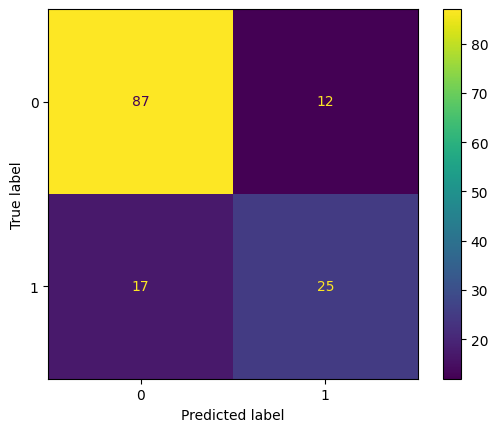

In [66]:
cm=confusion_matrix(y_test,predictions)
p=ConfusionMatrixDisplay(confusion_matrix=cm)
p.plot()
plt.show()